###Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


###Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data Analytics Project/vgsales.csv")

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


###Checking for null values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data.isnull().sum()

0


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data.shape

(16598, 11)

In [ ]:
data.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [ ]:
data.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
def num_of_null_val_nd_percentage(df):
    values = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
    total = pd.concat([values, percent], axis = 1, keys = ['Total Values', 'Percentage'])
    return total
num_of_null_val_nd_percentage(data)

,Total Values,Percentage
Year,271,0.016327
Publisher,58,0.003494
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Genre,0,0.000000
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


<Axes: >

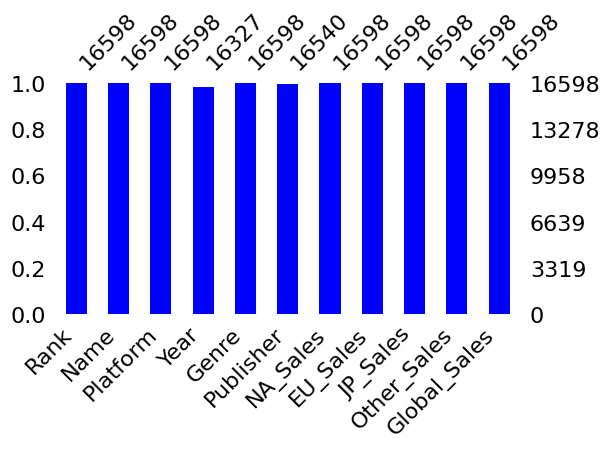

In [ ]:
import missingno as msno
msno.bar(data, figsize=(6, 3), color='blue')

In [ ]:
data.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
cat_col = []
num_col= []
for i in data.columns:
    if data[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

In [ ]:
print("Categorical Columns :", cat_col)
print("Numerical Columns :", num_col)

Categorical Columns : ['Name', 'Platform', 'Genre', 'Publisher']
Numerical Columns : ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [ ]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### Filling the null values using mean

In [ ]:
data.Year.fillna(data.Year.median(), inplace = True)

In [ ]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

### Dropping the unwanted columns

In [ ]:
data.drop(['Publisher'], inplace = True, axis = 1)

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
data.describe(exclude = 'object')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


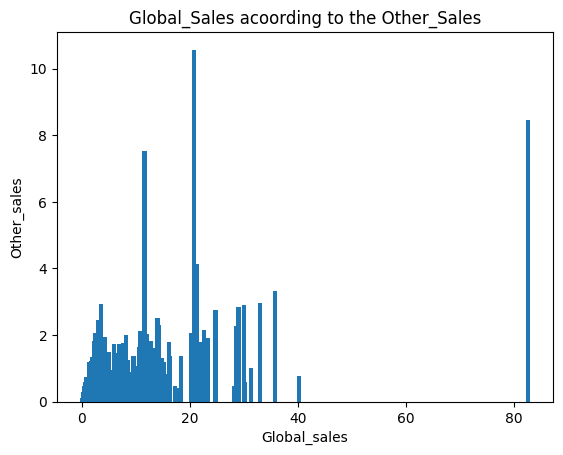

In [ ]:
plt.bar(data['Global_Sales'],data['Other_Sales'] )
plt.xlabel('Global_sales')
plt.ylabel('Other_sales')
plt.title('Global_Sales acoording to the Other_Sales')
plt.show()

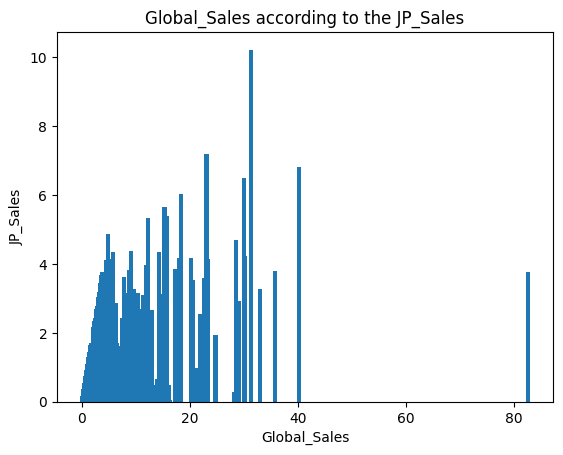

In [ ]:
plt.bar(data['Global_Sales'],data['JP_Sales'] )
plt.xlabel('Global_Sales')
plt.ylabel('JP_Sales')
plt.title('Global_Sales according to the JP_Sales')
plt.show()

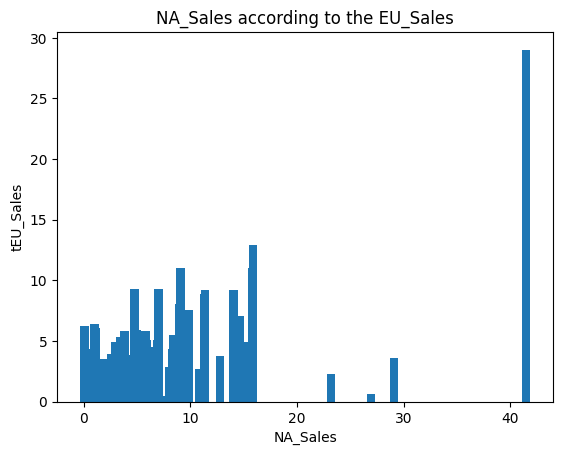

In [ ]:
plt.bar(data['NA_Sales'],data['EU_Sales'] )
plt.xlabel('NA_Sales')
plt.ylabel('tEU_Sales')
plt.title('NA_Sales according to the EU_Sales')
plt.show()

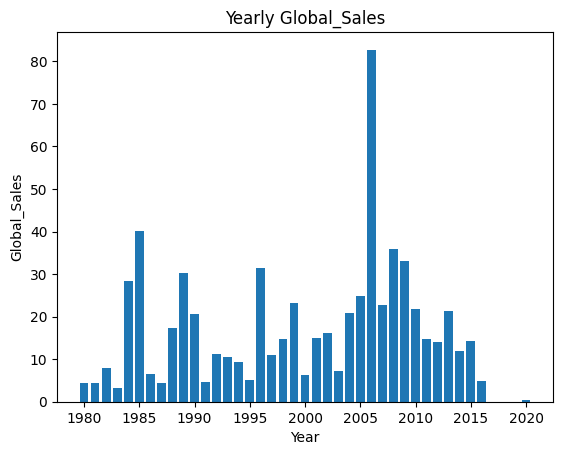

In [ ]:
plt.bar(data['Year'],data['Global_Sales'] )
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.title('Yearly Global_Sales')
plt.show()

(array([1.6528e+04, 5.4000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.057,  2.114,  3.171,  4.228,  5.285,  6.342,  7.399,
         8.456,  9.513, 10.57 ]),
 <BarContainer object of 10 artists>)

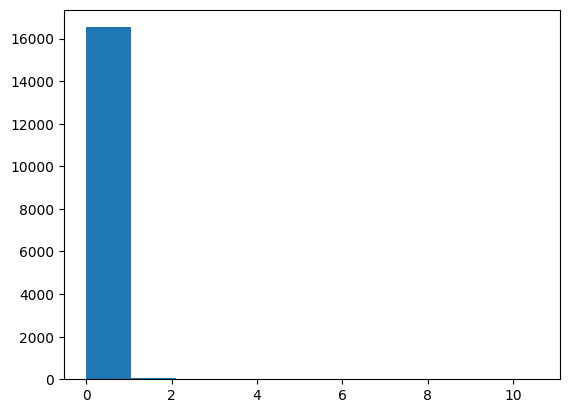

In [ ]:
plt.hist(data['Other_Sales'])

(array([1.6516e+04, 5.9000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2830e+00, 1.6556e+01, 2.4829e+01, 3.3102e+01,
        4.1375e+01, 4.9648e+01, 5.7921e+01, 6.6194e+01, 7.4467e+01,
        8.2740e+01]),
 <BarContainer object of 10 artists>)

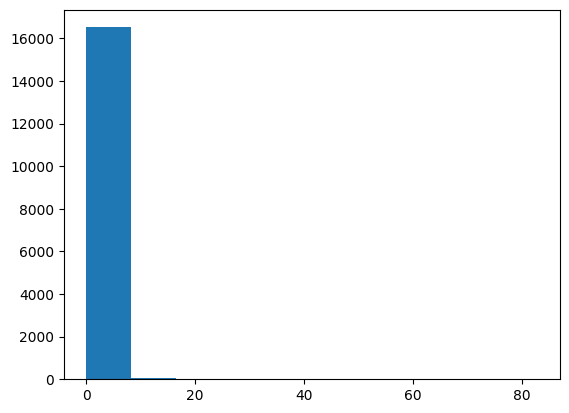

In [ ]:
plt.hist(data['Global_Sales'])

<Axes: ylabel='Global_Sales'>

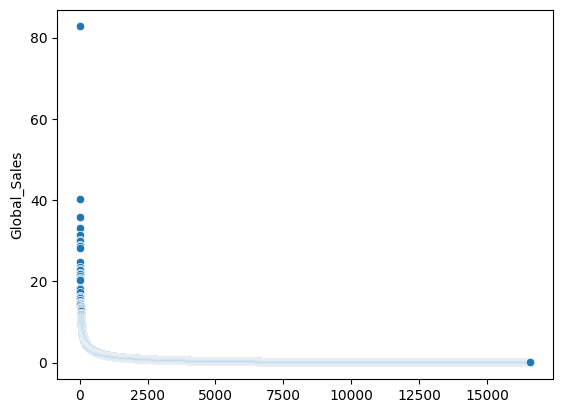

In [ ]:
sns.scatterplot(data['Global_Sales'])

<Axes: ylabel='Other_Sales'>

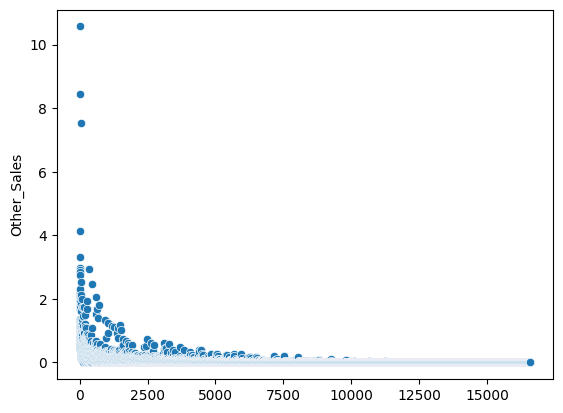

In [ ]:
sns.scatterplot(data['Other_Sales'])

<ipython-input-34-096d0d3680e5>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year",y="Global_Sales",data=data,ci=None)


<Axes: xlabel='Year', ylabel='Global_Sales'>

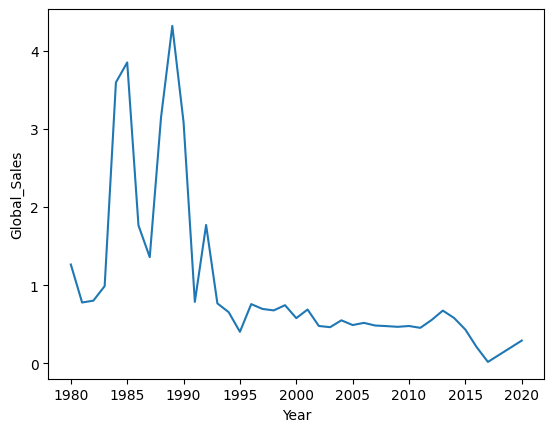

In [ ]:
sns.lineplot(x="Year",y="Global_Sales",data=data,ci=None)

<ipython-input-35-5363b4f11c0f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Global_Sales",y="NA_Sales",data=data,ci=None)


<Axes: xlabel='Global_Sales', ylabel='NA_Sales'>

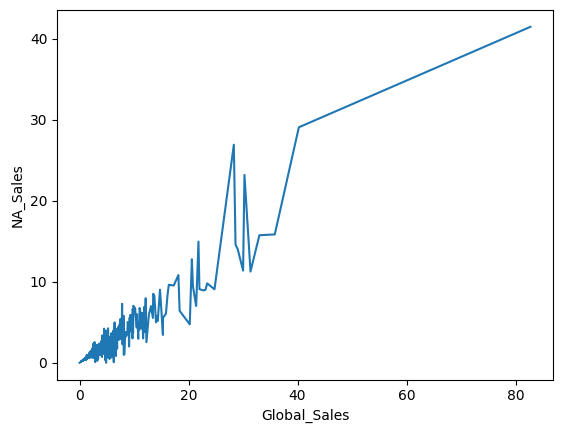

In [ ]:
sns.lineplot(x="Global_Sales",y="NA_Sales",data=data,ci=None)

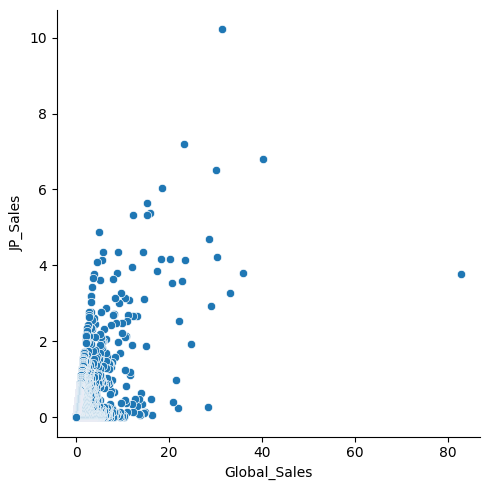

In [ ]:
sns.relplot(x="Global_Sales",y="JP_Sales",data=data)

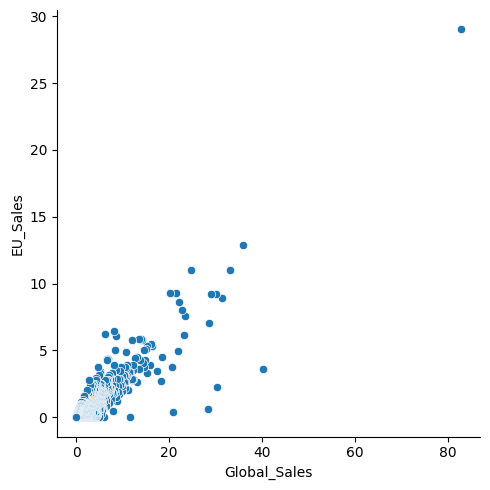

In [ ]:
sns.relplot(x="Global_Sales",y="EU_Sales",data=data)

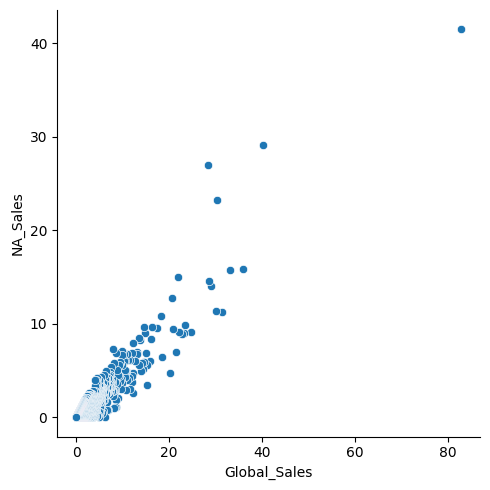

In [ ]:
sns.relplot(x="Global_Sales",y="NA_Sales",data=data)

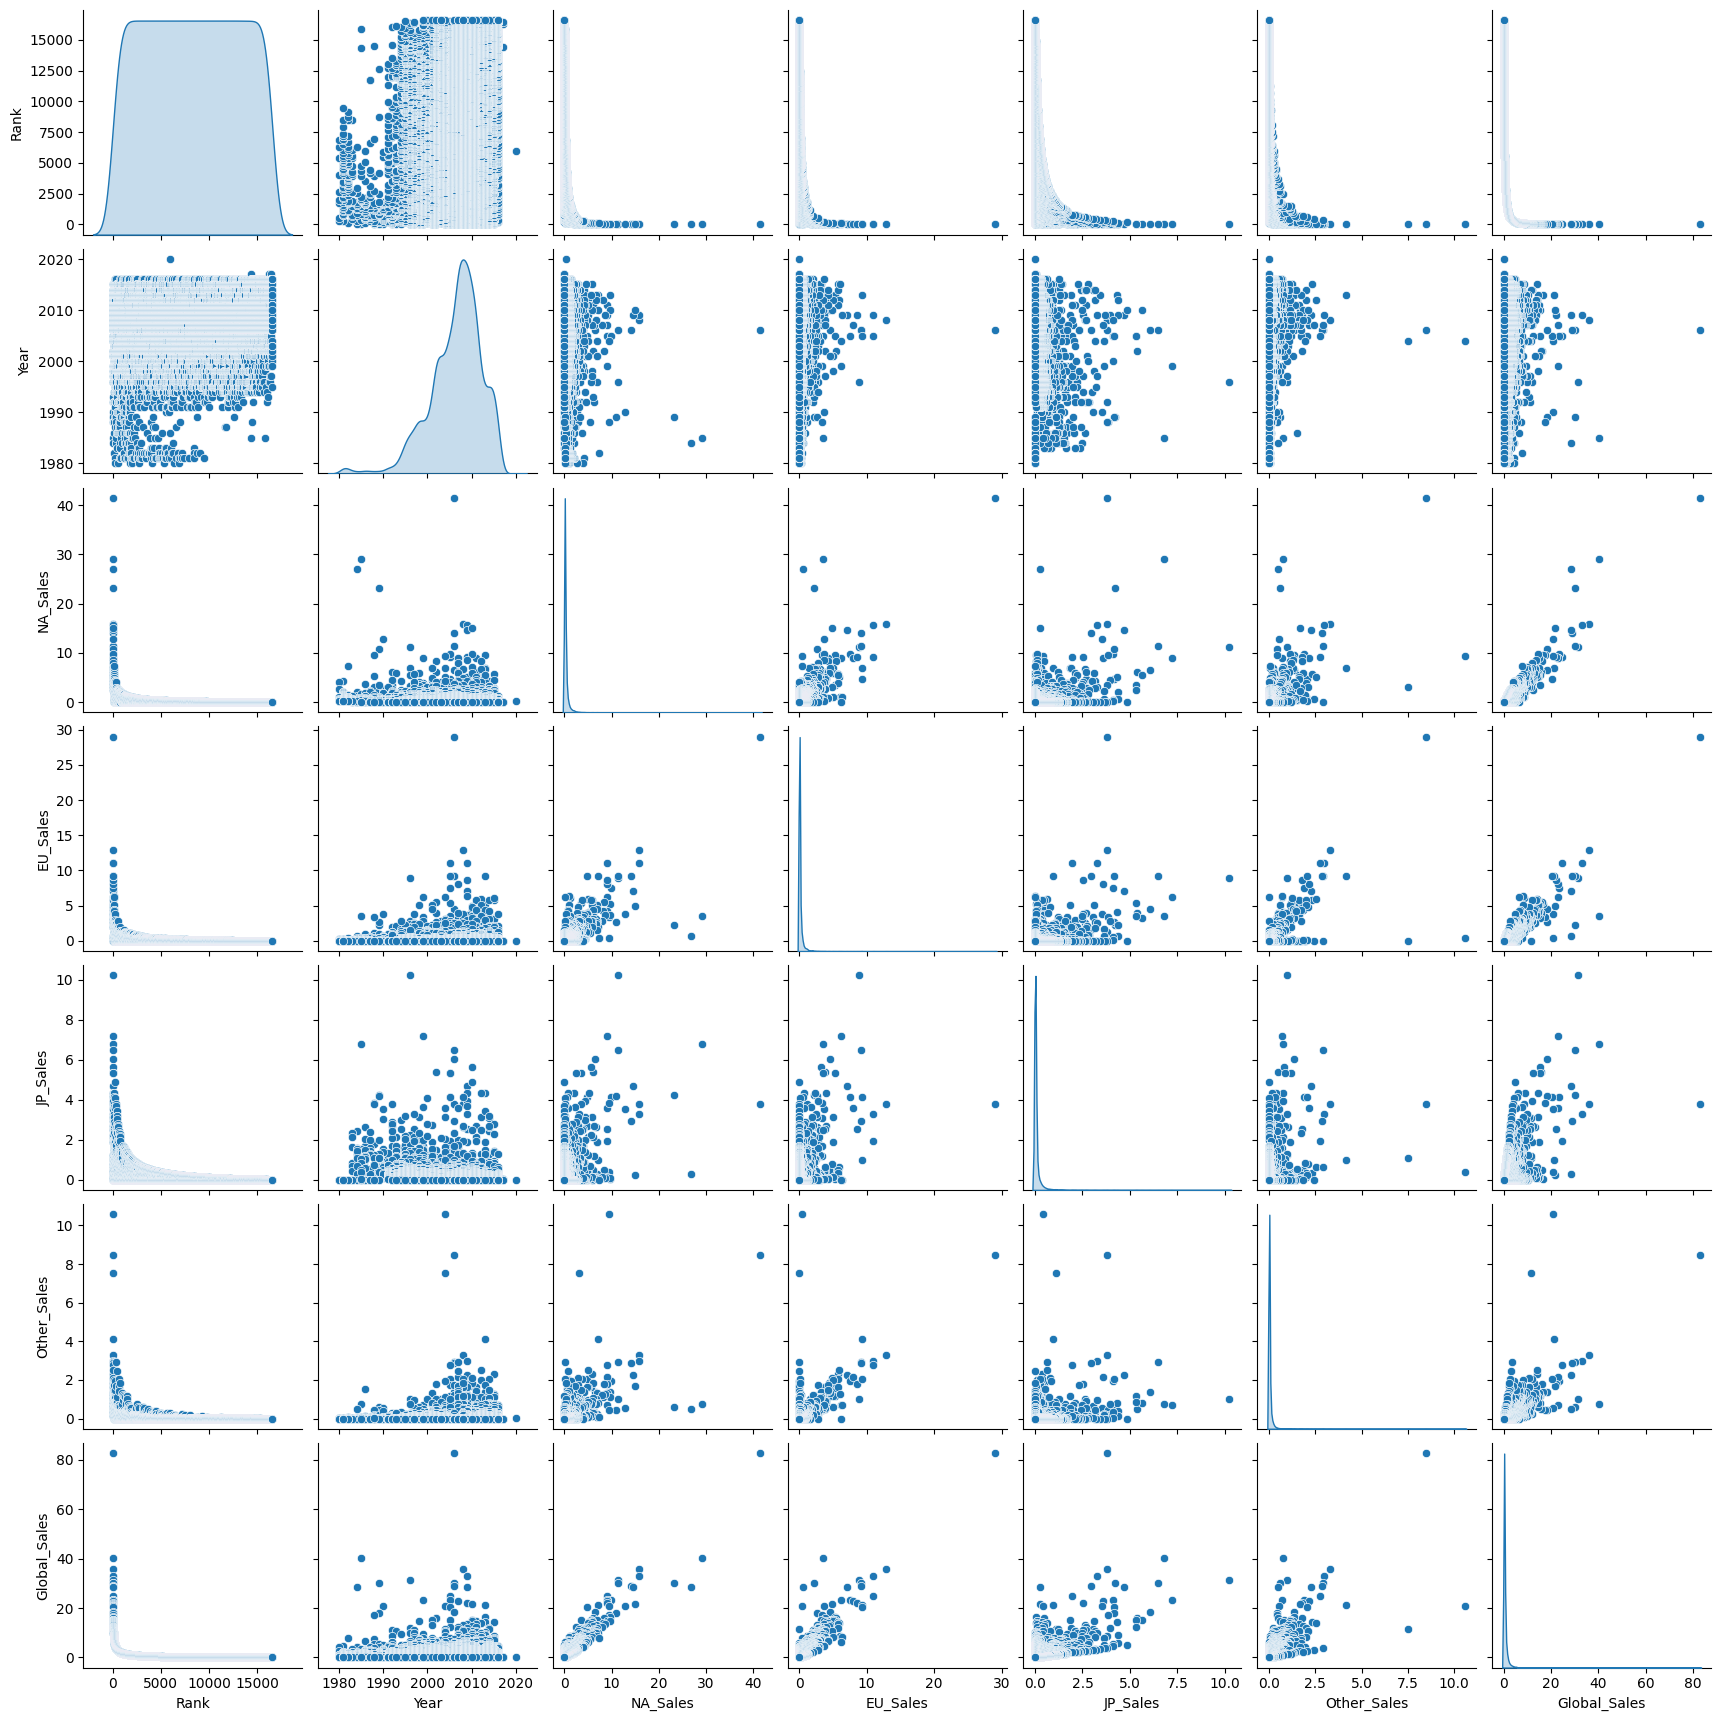

In [ ]:
sns.pairplot(data,diag_kind='kde')

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


#FEATURE EXTRACTION

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [ ]:
x = data.iloc[:,0:9]
x.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00


In [ ]:
y = data['Global_Sales']
y.head()

0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
Name: Global_Sales, dtype: float64

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Name=le.fit_transform(x.Name)
x.Platform=le.fit_transform(x.Platform)
x.Genre=le.fit_transform(x.Genre)
x.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,11007,26,2006.0,10,41.49,29.02,3.77,8.46
1,2,9327,11,1985.0,4,29.08,3.58,6.81,0.77
2,3,5573,26,2008.0,6,15.85,12.88,3.79,3.31
3,4,11009,26,2009.0,10,15.75,11.01,3.28,2.96
4,5,7346,5,1996.0,7,11.27,8.89,10.22,1.00


In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [ ]:
x_scaled.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.000000,0.957797,0.866667,0.650,0.909091,1.000000,1.000000,0.368885,0.800378
1,0.000060,0.811608,0.366667,0.125,0.363636,0.700892,0.123363,0.666341,0.072848
2,0.000120,0.484946,0.866667,0.700,0.545455,0.382020,0.443832,0.370841,0.313150
3,0.000181,0.957971,0.866667,0.725,0.909091,0.379610,0.379394,0.320939,0.280038
4,0.000241,0.639227,0.166667,0.400,0.636364,0.271632,0.306340,1.000000,0.094607


In [ ]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13278, 9), (3320, 9), (13278,), (3320,))

#MACHINE LEARNINIG MODELS


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = lr.predict(x_test)

In [ ]:
pred

array([ 1.24962454,  0.35006686,  0.28031528, ...,  0.4799281 ,
        0.35008567, 29.00936038])

In [ ]:
lr.predict(ms.transform([[1,11007,26,2006.0, 10,41.49,29.02,3.77,8.46]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.20127923])

####Evaluation Metrics for the LinearRegression Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0029804823736240085
Mean Squared Error: 2.6842205913424798e-05
Root Mean Squared Error: 0.005180946430279394
R-squared: 0.9999880111564263


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
y_test

1586     1.25
5368     0.34
6275     0.27
9130     0.14
5759     0.31
        ...  
1911     1.08
4944     0.39
4110     0.48
5291     0.35
7       29.02
Name: Global_Sales, Length: 3320, dtype: float64

In [ ]:
dtr.predict(ms.transform([[1,11007,26,2006.0, 10,41.49,29.02,3.77,8.46]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([82.74])

####Evaluation Metrics for the Decisiontree model

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0047138554216870155
Mean Squared Error: 0.009482981927710837
Root Mean Squared Error: 0.09738060344704605
R-squared: 0.995764506564397


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
R_pred = rfr.predict(x_test)

In [ ]:
rfr.predict([[1,11007,26,2006.0, 10,41.49,29.02,3.77,8.46]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([65.6418])

####Evaluation Metrics for the RandomForest Regressor

In [ ]:
mae = mean_absolute_error(y_test, R_pred)
mse = mean_squared_error(y_test, R_pred)
rmse = mean_squared_error(y_test, R_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, R_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0037548795180726126
Mean Squared Error: 0.008880761174698855
Root Mean Squared Error: 0.0942377905868917
R-squared: 0.9960334833552008
